In [1]:
from astropy.io import ascii
from astropy.time import Time
import numpy as np
import matplotlib.pyplot as plt


Download data for Caballo releases from https://www.usbr.gov/rsvrWater/HistoricalApp.html

Edit file to remove trailing lines and empty columns, into data.csv

In [2]:
def mon(month) :
    if month == 'Jan' : return(1)
    elif month == 'Feb' : return(2)
    elif month == 'Mar' : return(3)
    elif month == 'Apr' : return(4)
    elif month == 'May' : return(5)
    elif month == 'Jun' : return(6)
    elif month == 'Jul' : return(7)
    elif month == 'Aug' : return(8)
    elif month == 'Sep' : return(9)
    elif month == 'Oct' : return(10)
    elif month == 'Nov' : return(11)
    elif month == 'Dec' : return(12)


Create new dates in astropy recognized order

In [4]:
data=ascii.read('data2.csv')
new=[]
for d in np.char.split(data['Date'],'-') :
    new.append('{:d}-{:d}-{:d}'.format(int(d[2]),mon(d[1]),int(d[0])))

/Users/holtz/anaconda3/envs/pyvista/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 8034 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Text(0, 0.5, 'Release (cfs)')

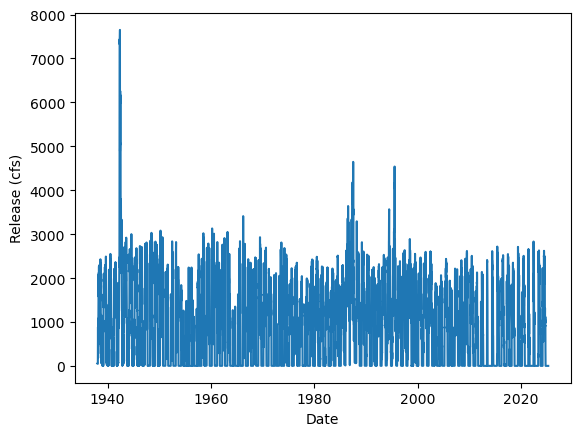

In [5]:
%matplotlib inline
plt.plot(Time(new).jyear,data['Total Release (cfs)'])
plt.xlabel('Date')
plt.ylabel('Release (cfs)')


In [6]:
date=Time(new)
from astropy.table import Table

tab=Table(names=['year','first','last','ndays','total cfs'],dtype=('i4','S12', 'S12', 'i4', 'f4'))
for year in range(int(date.jyear.min()),int(date.jyear.max())) :
    j=np.where((date.jyear>year) & (date.jyear<year+1))[0]
    i1=500
    i2=0
    for i,day in enumerate(date[j]) :
        if data['Total Release (cfs)'][j[i]] > 100 :
            if i < i1 : i1 = i
            if i > i2 : i2 = i

    start=date[j[i1]].datetime
    end=date[j[i2]].datetime
    #j=np.where((date.datetime >=start) & (date.datetime <=end) )[0]
    print(start.strftime("%Y-%m-%d"),end.strftime("%Y-%m-%d"),(end-start).days,data['Total Release (cfs)'][j].sum() )
    tab.add_row([year,start.strftime("%Y-%m-%d"),end.strftime("%Y-%m-%d"),(end-start).days,data['Total Release (cfs)'][j].sum()])

/Users/holtz/anaconda3/envs/pyvista/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


1938-02-08 1938-12-19 314 393381
1939-02-06 1939-12-19 316 397857
1940-02-09 1940-11-25 290 369058
1941-02-22 1941-12-11 292 355128
1942-01-27 1943-01-01 339 905698
1943-01-29 1943-12-30 335 459515
1944-02-14 1944-12-14 304 436770
1945-02-05 1945-12-17 315 444818
1946-02-16 1946-12-20 307 385130
1947-02-22 1947-09-16 206 365528
1948-03-15 1948-12-15 275 373741
1949-03-05 1949-12-18 288 359160
1950-02-21 1950-09-12 203 362746
1951-03-06 1951-09-12 190 236756
1952-03-20 1952-09-12 176 274326
1953-03-10 1953-09-12 186 266590
1954-03-20 1954-09-05 169 123218
1955-03-20 1955-09-13 177 110647
1956-03-18 1956-09-10 176 124211
1957-03-20 1957-09-22 186 200308
1958-03-01 1958-09-24 207 371695
1959-03-02 1959-09-15 197 346672
1960-03-02 1960-09-16 198 355610
1961-03-10 1961-09-10 184 283317
1962-03-05 1962-09-11 190 328783
1963-03-05 1963-09-10 189 260826
1964-03-15 1964-09-10 179 103968
1965-03-20 1965-09-17 181 254973
1966-03-05 1966-09-18 197 307784
1967-02-27 1967-09-17 202 230312
1968-02-27

In [7]:
tab.pprint_all()

year   first       last    ndays total cfs
---- ---------- ---------- ----- ---------
1938 1938-02-08 1938-12-19   314  393381.0
1939 1939-02-06 1939-12-19   316  397857.0
1940 1940-02-09 1940-11-25   290  369058.0
1941 1941-02-22 1941-12-11   292  355128.0
1942 1942-01-27 1943-01-01   339  905698.0
1943 1943-01-29 1943-12-30   335  459515.0
1944 1944-02-14 1944-12-14   304  436770.0
1945 1945-02-05 1945-12-17   315  444818.0
1946 1946-02-16 1946-12-20   307  385130.0
1947 1947-02-22 1947-09-16   206  365528.0
1948 1948-03-15 1948-12-15   275  373741.0
1949 1949-03-05 1949-12-18   288  359160.0
1950 1950-02-21 1950-09-12   203  362746.0
1951 1951-03-06 1951-09-12   190  236756.0
1952 1952-03-20 1952-09-12   176  274326.0
1953 1953-03-10 1953-09-12   186  266590.0
1954 1954-03-20 1954-09-05   169  123218.0
1955 1955-03-20 1955-09-13   177  110647.0
1956 1956-03-18 1956-09-10   176  124211.0
1957 1957-03-20 1957-09-22   186  200308.0
1958 1958-03-01 1958-09-24   207  371695.0
1959 1959-0

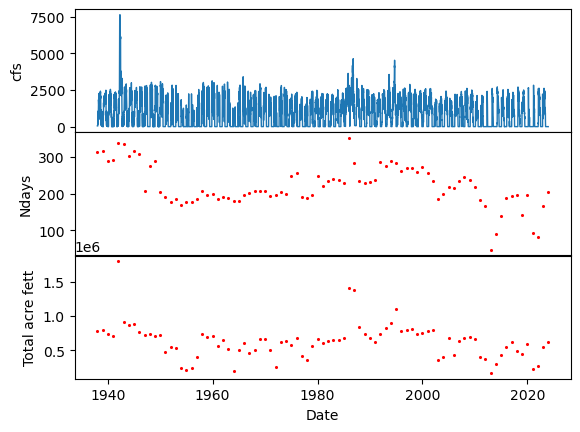

In [8]:
from holtztools import plots
fig,ax=plots.multi(1,3,hspace=0.001)
plots.plotl(ax[0],date.jyear,data['Total Release (cfs)'],yt='cfs')
plots.plotp(ax[1],tab['year'],tab['ndays'],yt='Ndays')
plots.plotp(ax[2],tab['year'],tab['total cfs']*86400*2.29569e-5,yt='Total acre fett',xt='Date')
fig.savefig('caballo.png')

In [9]:
from holtztools import plots
import importlib
importlib.reload(plots)
fig,ax=plots.bokeh_multi(1,3,width=1200,height=300,sharex=True)
plots.bokeh_plotl(ax[0,0],date.jyear,data['Total Release (cfs)'],yt='cfs')
plots.bokeh_plotp(ax[1,0],tab['year'],tab['ndays'],yt='Ndays')
plots.bokeh_plotp(ax[2,0],tab['year'],tab['total cfs']*86400*2.29569e-5,yt='Total acre feet',xt='Date')
#fig.savefig('caballo.png')

from bokeh.plotting import save
from bokeh.resources import CDN
from bokeh.embed import file_html
output = file_html(fig,CDN)
plots.bokeh_show(fig,outfile='caballo.html')

In [10]:
tab['acre-feet'] = tab['total cfs']*86400*2.29569e-5
ascii.write(tab,'caballo.csv',overwrite=True,delimiter=',')

In [11]:
with open('caballo_embed.html','w') as f :
    f.write(output)
    


In [12]:
1*86400*2.29569e-5


1.98347616